In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import signal

# In computer vision convolution is same as cross corelation/image filtering 
filter or mask or window

basically in mathematic befor convolution we must flip matrix horizontaly and verticaly

# Blurring
we choose patch around a pixel e.g 5x5 and get average of the patch and replace that with number of that pixel

# sharpening
reverse of bluring
first edge detection then then Image + GradientMangnitude

fx and fy is horizontal and vertical edge dection which apply by filter

### Edges


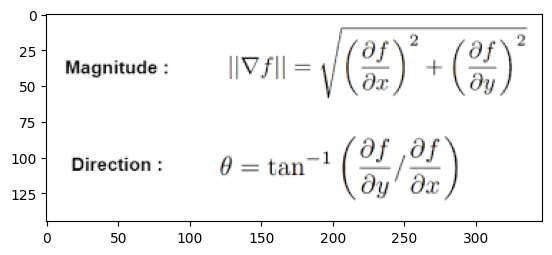

In [2]:
plt.imshow(cv.imread('gradient manitude of image.png')[:, :, ::-1])
plt.show()

In [3]:
def blur(img, kernel_size=3):
    y = img.shape[1]
    new = np.vstack((np.zeros(y), img))
    new = np.vstack((new, np.zeros(y)))
    x = new.shape[0]
    new = np.hstack((np.zeros((x, 1)), new))
    new = np.hstack((new, np.zeros((x, 1))))
    row, col = new.shape
    padded = new * (1 / np.square(kernel_size))
    img2 = np.zeros((padded.shape[0]-2, padded.shape[1]-2))
    for i in range(row-2):
        for j in range(col-2):
            img2[i, j] = np.sum(padded[i-1:i+2, j-1:j+2])
            
    return img2

In [4]:
img = cv.imread('flower.jpeg')
R = img[:, :, 2]
G = img[:, :, 1]
B = img[:, :, 0]

In [5]:
R_new = blur(R)

In [6]:
G_new = blur(G)

In [7]:
B_new = blur(B)

In [8]:
X = np.concatenate((R_new[:, :, np.newaxis], G_new[:, :, np.newaxis], B_new[:, :, np.newaxis]), axis=2)

In [9]:
X.shape

(996, 1500, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


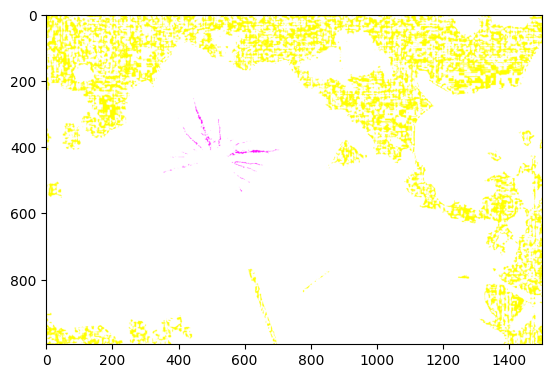

In [10]:
plt.imshow(X)

In [11]:
img = cv.imread('cat.jpeg')[:, :, ::-1]
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# img2 = img2 > 155
# img2 = img2.astype(np.uint16)
# R = (img[:, :, 2] > 155).astype(np.uint16)
# G = (img[:, :, 1] > 155).astype(np.uint16)
# B = (img[:, :, 0] > 155).astype(np.uint16)
# k_rect = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
# R_gradient = cv.morphologyEx(R, cv.MORPH_GRADIENT, k_rect)
# G_gradient = cv.morphologyEx(G, cv.MORPH_GRADIENT, k_rect)
# B_gradient = cv.morphologyEx(B, cv.MORPH_GRADIENT, k_rect)
# img_edge = cv.morphologyEx(img2, cv.MORPH_GRADIENT, k_rect)

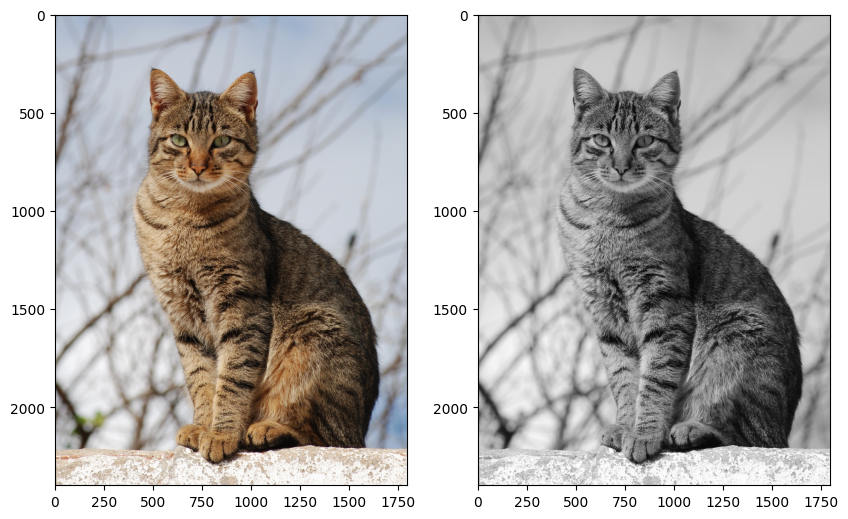

In [12]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [13]:
smoothingMask = np.ones((20, 20))/255
#for more blury image choose big filter or apply one filter several times

In [18]:
img_blurred = signal.convolve2d(img_gray,
                              smoothingMask,
                              boundary='symm',
                              mode='same')

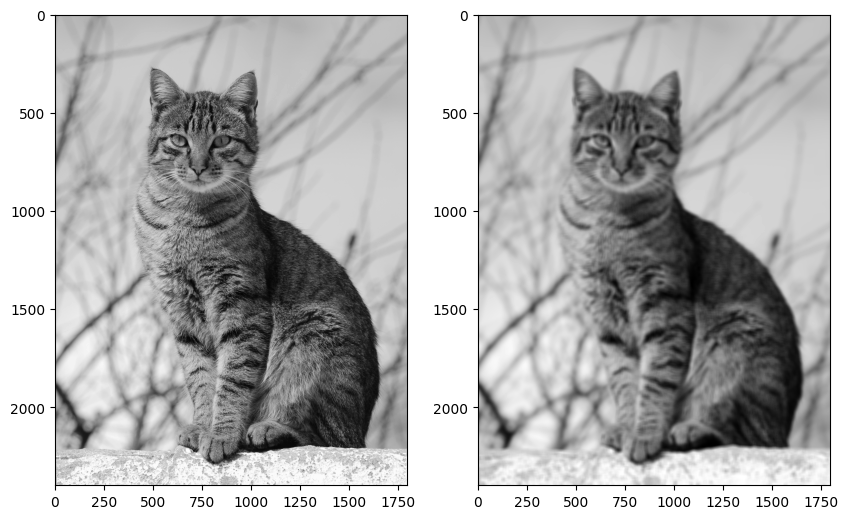

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.imshow(img_gray, cmap='gray')
ax2.imshow(img_blurred, cmap='gray')
plt.show()

In [12]:
xMask = np.array([[-1, 0, 1],
                  [-1, 0, 1],
                  [-1, 0, 1]])
yMask = xMask.T.copy()

In [15]:
fx = signal.convolve2d(img_gray, xMask, boundary='symm', mode='same')
fy = signal.convolve2d(img_gray, yMask, boundary='symm', mode='same')

In [16]:
# Gm = (fx ** 2 + fy ** 2) ** 0.5
Gm = np.sqrt(np.square(fx) + np.square(fy))

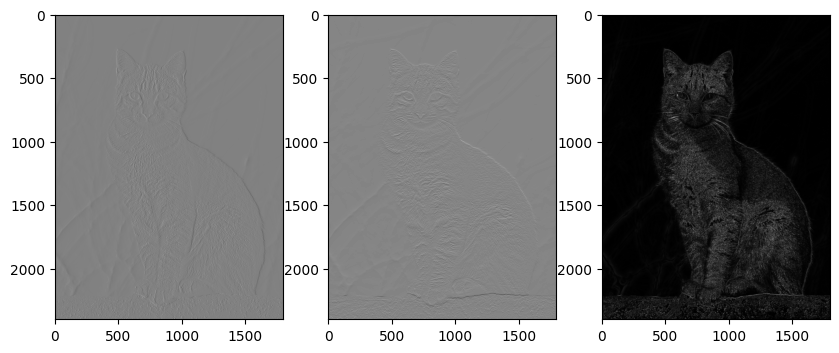

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 8))
ax1.imshow(fx, cmap='gray')
ax2.imshow(fy, cmap='gray')
ax3.imshow(Gm, cmap='gray')
plt.show()

In [268]:
th = Gm.max() - 10 * Gm.std()
th

90.7966305247819

In [269]:
Gm_th = Gm > th

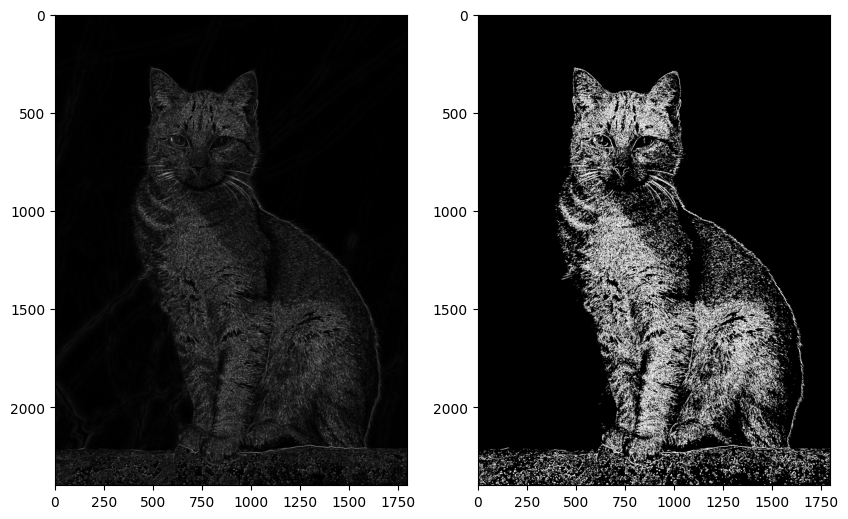

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.imshow(Gm, cmap='gray')
ax2.imshow(Gm_th, cmap='gray')
plt.show()

In [286]:
img_sharped = img_blurred + 1 * Gm

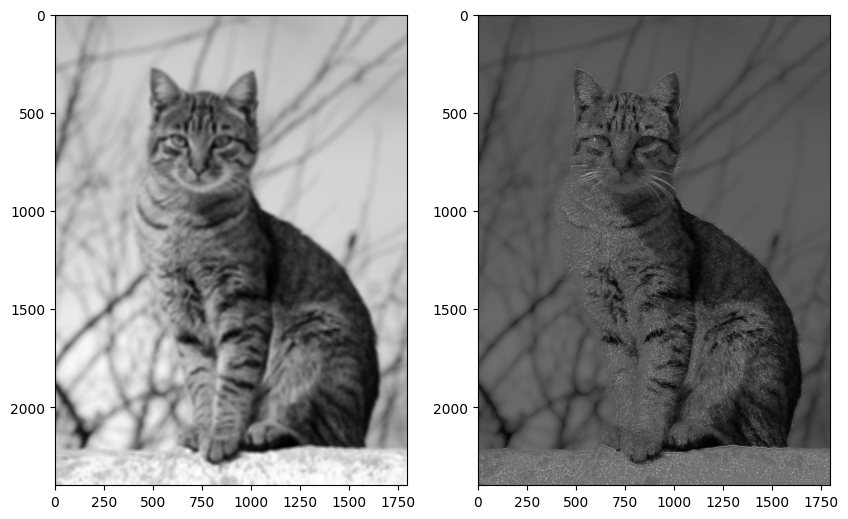

In [287]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
ax1.imshow(img_blurred, cmap='gray')
ax2.imshow(img_sharped, cmap='gray')
plt.show()

In [19]:
img = cv.imread('flower2.jpg')[:, :, ::-1]
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

xMask = np.array([[-1, 0, 1],
                  [-1, 0, 1],
                  [-1, 0, 1]])
yMask = xMask.T.copy()

fx = signal.convolve2d(img_gray, xMask, boundary='symm', mode='same')
fy = signal.convolve2d(img_gray, yMask, boundary='symm', mode='same')

Gm = np.sqrt(np.square(fx) + np. square(fy))

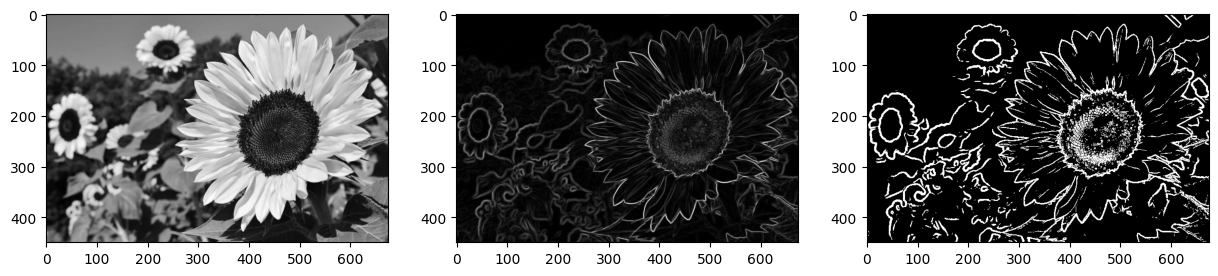

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.imshow(img_gray, cmap='gray')
ax2.imshow(Gm, cmap='gray')
ax3.imshow(Gm>100, cmap='gray')
plt.show()